# Exercise 1
```In this exercise you will experience with pandas, matplotlib and numpy. This are main tools we are going to use later in course, and which are extremly useful in a variety of tasks. For each question, answer it in cells directly beneath it.```

```You are more than encourged to read relevant parts, mainly from ``` [pandas' API](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

```~ Ittai Haran```

## DataFrame basics

```A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames```

```import numpy and pandas```

In [0]:
import pandas as pd
import numpy as np
import matplotlib as pb

```Consider the following Python dictionary `data` and Python list `labels`:```

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

```Create a DataFrame `df` from this dictionary `data` which has the index `labels`.```

In [0]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data,labels)

```Display a summary of the basic information about this DataFrame and its data using the decribe and the info functions```

In [3]:
df.describe()

,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


```Return the first 3 rows of the DataFrame `df`. Do it two times: use head and iloc```

In [4]:
#@title Default title text
df.head(3)
df.iloc[:3]

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2


```Select just the 'animal' and 'age' columns from the DataFrame `df`.```

In [5]:
df.iloc[0:10,0:2]

,age,animal
a,2.5,cat
b,3.0,cat
c,0.5,snake
d,NaN,dog
e,5.0,dog
f,2.0,cat
g,4.5,snake
h,NaN,cat
i,7.0,dog
j,3.0,dog


```Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.```

In [6]:
df.iloc[[3,4,8],[0,1]]

,age,animal
d,NaN,dog
e,5.0,dog
i,7.0,dog


```Select only the rows where the number of visits is greater than 3. Pandas supports two useful APIs:
(df[boolean list/series]) returns the rows for which the value is True
(df[column] > num) returns a boolean series```

In [7]:
df[df["visits"]>2]

,age,animal,priority,visits
b,3.0,cat,yes,3
d,NaN,dog,yes,3
f,2.0,cat,no,3


```Select the rows where the age is missing, i.e. is `NaN`.```

In [8]:
df[df['age'].isna()]

,age,animal,priority,visits
d,NaN,dog,yes,3
h,NaN,cat,yes,1


```Select the rows where the animal is a cat *and* the age is less than 3. You can use logical operands: &, |, ~```

In [9]:
df[(df['age']<3) & (df['animal']=='cat')]

,age,animal,priority,visits
a,2.5,cat,yes,1
f,2.0,cat,no,3


```Select the rows the age is between 2 and 4 (inclusive).```

In [10]:
df[(df['age']<=4) & (df['age']>=2)]

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
f,2.0,cat,no,3
j,3.0,dog,no,1


```Change the age in row 'f' to 1.5.```

In [11]:
df.set_value('f','age',1.5)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2
d,NaN,dog,yes,3
e,5.0,dog,no,2
f,1.5,cat,no,3
g,4.5,snake,no,1
h,NaN,cat,yes,1
i,7.0,dog,no,2
j,3.0,dog,no,1


```Calculate the sum of all visits (the total number of visits). Do it twice: using built in pandas functions and using numpy```

In [12]:
sum(df['visits'])
np.sum(df['visits'])

19

```Calculate the mean age for each different animal in `df`.```

In [13]:
df[df['animal']=='cat'].iloc[:,0:1].mean()
df[df['animal']=='dog'].iloc[:,0:1].mean()
df[df['animal']=='snake'].iloc[:,0:1].mean()
df.groupby(['animal']).mean()

,age,visits
animal,,
cat,2.333333,2.0
dog,5.000000,2.0
snake,2.500000,1.5


```Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.```

In [14]:
df2 = pd.DataFrame([[3,'horse','yes',2]],index=['k'],columns=['age','animal','priority','visits'])
df.append(df2)
df.drop(df.index[9])

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2
d,NaN,dog,yes,3
e,5.0,dog,no,2
f,1.5,cat,no,3
g,4.5,snake,no,1
h,NaN,cat,yes,1
i,7.0,dog,no,2


```Count the number of each type of animal in `df`.```

In [15]:
df.groupby(['animal']).size()

animal
cat      4
dog      4
snake    2
dtype: int64

```Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visit' column in *ascending* order. You can use the sort_values function```

In [16]:
df.sort_values(by=['age'],ascending=False)
df.sort_values(by=['visits'])

,age,animal,priority,visits
a,2.5,cat,yes,1
g,4.5,snake,no,1
h,NaN,cat,yes,1
j,3.0,dog,no,1
c,0.5,snake,no,2
e,5.0,dog,no,2
i,7.0,dog,no,2
b,3.0,cat,yes,3
d,NaN,dog,yes,3
f,1.5,cat,no,3


```The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.```

In [17]:
d = {'yes': True, 'no': False}
df['priority'].map(d)

a     True
b     True
c    False
d     True
e    False
f    False
g    False
h     True
i    False
j    False
Name: priority, dtype: bool

```In the 'animal' column, change the 'snake' entries to 'python'.```

In [18]:
df.set_value('g','animal','python')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2
d,NaN,dog,yes,3
e,5.0,dog,no,2
f,1.5,cat,no,3
g,4.5,python,no,1
h,NaN,cat,yes,1
i,7.0,dog,no,2
j,3.0,dog,no,1


```For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).```

In [26]:
table = df.pivot_table(values='age', index='animal', columns='visits', aggfunc=np.mean)
table

visits,1,2,3
animal,,,
cat,2.5,NaN,2.25
dog,3.0,6.0,NaN
python,4.5,NaN,NaN
snake,NaN,0.5,NaN


```Now you will be asked to generate your own test data and manipulate it using functions you will have to create.```

```Create a dataframe with 1000 rows and 3 columns. The columns are to be the following:```
```
        - age: an integer, uniformly distributed between 20 to 65
        - skill: a float, normally distributed between 0 and 1, with expected value = 0.5 and standard deviation = 0.3
        - height: a float with 2 digits after the decimal point, between 1.5 to 2.0
```
```you might want to use numpy.random```

In [20]:
age = np.random.randint(low=20, high=66, size=1000)
skill=np.random.normal(0.5, 0.3, 1000)
height = np.around(np.random.uniform(low = 1.5, high = 2, size = 1000), decimals=2)
df2 = pd.DataFrame(data={'age':age, 'skill': skill,'height':height})
df2

,age,height,skill
0,45,1.52,0.352851
1,37,1.73,0.852663
2,57,1.61,0.304922
3,36,1.68,0.561054
4,61,1.72,1.053334
5,31,1.66,0.815494
6,54,1.73,0.527336
7,21,1.73,0.438887
8,63,1.64,0.395440
9,64,1.78,0.285550


```Add the dataframe a new columns, called salary, when:```
        <center>$salary = 1000\cdot((age^2)/1000 + 1.7\cdot skill + 0.4\cdot exp(-(height-1.7)^2)$<center>

In [21]:
first = (age*age)/1000
second = 1.7*skill
third = (height-1.7)*(height-1.7)
fourth = np.exp(-1*third)
salary = 1000*(first+second+third+fourth)
df2['salary'] = salary
df2

,age,height,skill,salary
0,45,1.52,0.352851,3600.366235
1,37,1.73,0.852663,3449.527045
2,57,1.61,0.304922,4518.400173
3,36,1.68,0.561054,2953.791893
4,61,1.72,1.053334,5790.667765
5,31,1.66,0.815494,2386.341557
6,54,1.73,0.527336,3896.471319
7,21,1.73,0.438887,1746.109105
8,63,1.64,0.395440,4672.254173
9,64,1.78,0.285550,5485.454622


```Split the dataframe to groups by the age left digit and by the age. for each group compute:```
```
        - the number of rows
        - the mean salary
        - the maximum height     
```

```To do so, read about the groupby and agg functions is the ``` [pandas API](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

In [22]:
group_age = df2.groupby(['age'])
print(group_age.agg({'age':['count'],'salary':'mean','height':'max'}))

df_left_digit = df2.groupby([lambda a: (df2['age'].loc[a])//10]) 
df_left_digit.agg({'age':'count'})
df_left_digit.agg({'salary':lambda a:np.mean(a)})
df_left_digit.agg({'height':lambda x:np.max(x)})


          salary   age height
            mean count    max
age                          
20   1627.646797    27   1.98
21   1915.761831    14   1.99
22   1848.790714    30   2.00
23   2045.522624    14   1.98
24   1701.350199    20   1.99
25   1920.898037    17   2.00
26   1560.371415    25   1.99
27   1921.233235    20   1.97
28   2128.999494    21   1.97
29   1804.368497    25   1.98
30   1800.071231    13   1.96
31   2115.391942    20   1.99
32   2863.748128    17   2.00
33   2759.621536    22   2.00
34   2757.917643    23   1.96
35   2900.787682    17   1.91
36   2780.376179    22   1.99
37   2825.863076    27   1.98
38   2800.355291    24   1.98
39   2797.155995    22   1.98
40   2849.824972    17   2.00
41   2886.065902    28   1.97
42   2864.908536    18   1.98
43   3052.371902    21   1.96
44   2735.544186    29   1.98
45   3801.452296    27   1.99
46   4034.055590    20   1.99
47   3930.508230    21   2.00
48   3799.178807    17   1.95
49   3734.899402    16   2.00
50   3983.

,height
2,2.0
3,2.0
4,2.0
5,2.0
6,2.0


```Now split the dataframe to groups by age. For each group compute the mean salary, divided by the sum of heights.```

In [23]:
ageGroups = df2.groupby('age')
ageGroups['salary'].mean() / ageGroups['height'].sum()

age
20     33.525166
21     78.870392
22     35.753060
23     83.422619
24     48.033602
25     63.437848
26     35.936698
27     54.027931
28     58.812141
29     40.906110
30     80.504080
31     60.874588
32     95.649570
33     70.560510
34     69.644385
35    101.390691
36     71.733132
37     58.933537
38     65.999418
39     71.192568
40    100.736125
41     59.092258
42     93.931427
43     84.226598
44     53.923599
45     80.454017
46    116.121347
47    104.813553
48    127.789398
49    133.915360
50     98.353542
51    100.943636
52    119.383124
53    143.758436
54     93.165692
55    116.621534
56    112.777278
57     92.278115
58    107.584620
59    130.508562
60    110.299513
61    111.273574
62    114.821084
63    124.292944
64    134.226411
65    164.085094
dtype: float64

```Add these lines to your code:```
```python
        import matplotlib.pyplot as plt
        %matplotlib inline
``` 
       
```Now try using the pd.DataFrame.plot function to show your data. Try also using pd.DataFrame.boxplot.```

TypeError: ignored

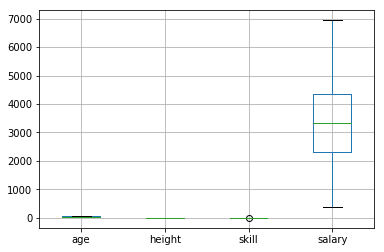

In [28]:
import matplotlib.pyplot as plt
plt.plot(pd.DataFrame.boxplot(df2))
        

```Save the result as a csv```

In [0]:
df2.to_csv

## Working with real-life data

```read the csv file entitled house_prices_numeric.csv consider writing the following line of code:```
```python
pd.options.display.max_columns=50
```

In [0]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_numeric.csv')

```In the following questions, print your answer if possible, draw a graph or visualize it in any other means. When drawing a graph, add a title to it. Answer the following questions (try using a single line of code for each):```
```
- What is oldest house in the dataset (YearBuilt)?
- What is the highest price (SalePrice) of houses built in that year?
- What is the mean area (LotArea) of houses?
- What is the 50-percentile of the area (LotArea) of houses?
- What is more common: having a fireplace (Fireplaces) in the house, or not having one?
- What is the mean price (SalePrice) of houses that have swimming pools (PoolArea)?
- How many houses were sold every year (YrSold)? Draw a graph using plt.plot or pandas.plot
- What is the distribution of the overall condition of the houses (OverallCond)? Use plt.hist or pandas.hist
- For every number of fireplaces in a house (Fireplaces), compute the mean price of a house, the mean age of the house (we are in 2019) and the count of distinct FullBath values
- Take only houses with MSSubClass > 60. Split into groups according to whether or not the MSSubClass is a multiple of 20. For each group compute the mean, max, min and standard deviation of OverallQual
```

In [0]:
print(df['YearBuilt'].min())
print(df['SalePrice'].max())
print(df['LotArea'].mean())
print(df['LotArea'].quantile())
print(df[df['Fireplaces']>0].shape[0])
print(df[df['Fireplaces']==0].shape[0])
print(df[df['PoolArea']>0]['SalePrice'].mean())
group1 = df.groupby(['YrSold'])
group2 = group1.size()
plt.plot(group2)
plt.show()
print(df['OverallCond'].hist())
salep = df.groupby(['Fireplaces'])['SalePrice'].mean()
yrs = df.groupby(['Fireplaces'])['YrSold'].mean()
bath = df.groupby(['Fireplaces'])['FullBath'].sum()
age = yrs*-1 + 2019
print(salep,age,bath)
bigMSB = df[df['MSSubClass']>60]

## Feature extraction

```Load the complete version of the houses table, entitled "house_prices_larger.csv"```

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_larger.csv')

```As you recall, the feature extraction process is done in order to let us describe the data in more "meaningful" manner. Add the following features to your dataframe:```
- ```LotArea in squared meters ( it's currently in units of squared feet)```
- ```1stFlrSF + 2ndFlrSF```
- ```GarageArea**0.5```
- ```LotArea / (BedroomAbvGr+1)```
- ```LotArea / (mean LotArea for houses built in that same year + 1e-5) - you might want to use``` [pandas merge function](https://www.google.com/search?q=pandas+merge&oq=pandas+merge&aqs=chrome..69i57l2j69i59l3j69i60.2080j0j9&sourceid=chrome&ie=UTF-8)
- ```Ranking of LotArea (largest house has 1, the second largest has 2 and so on)```
- ```One hot encoding of LotConfig - that is, add feature againts every value possible in LotConfig, which is 1 if the sample's LotConfig is this value and 0 otherwise (consider``` [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html))

```make a list of the names of the features you created.```

In [0]:
meter = df['LotArea']
df['SquaredMeter'] = meter**0.5
Floors = df['1stFlrSF']+df['2ndFlrSF']
df['Floors'] = Floors
sqaredGarage = df['GarageArea']**0.5
df['squareGarage'] = sqaredGarage
df.insert(0, 'room_area', df['LotArea'] / (df['BedroomAbvGr'] + 1))
averages = df.groupby('YearBuilt')['LotArea'].mean() + 1e-5
df.insert(0, 'LotMean', df['LotArea'] / np.array([averages[year] for year in df['YearBuilt']]))
df.insert(0, 'AreaRank', df['LotArea'].rank(method='dense'))
df = pd.get_dummies(df, columns=['LotConfig'])
features = ['SquaredMeter','Floors','squareGarage','room_area','LotMean','AreaRank', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2','LotConfig_FR3', 'LotConfig_Inside']
df.head()

## Simple linear model

```Next, we will train a simple linear model, as seen in class, to predict SalePrice. Use the features you computed. Create train and test segments, normalize the data (both the features and the target) and use a linear model. Make sure you don't somehow use the test data when training your model (or when normalizing your data).```

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [0]:
feature_data = df[features]
target = df["SalePrice"]

feature_train, feature_test, target_train, target_test = train_test_split(feature_data, target, test_size=0.3)

StandardScaler(feature_train)
StandardScaler(target_train)

lin_regressor = LinearRegression()
lin_regressor.fit(feature_train, target_train) 

price_test_fit = lin_regressor.predict(feature_test)
price = np.array(target_test)
price_model = np.array(price_test_fit)

plt.scatter(price,price_model)

```Next, we will add extra features: for any feature you computed earlier, add feature**2 and feature**3. Now use Ridge regression (regularized linear regression, as we discussed in class). Draw graphs of the loss computed on the train and on the validation as a function of the regularization parameter, for``` 1$\leq\alpha\leq$30. ```What regularization would it be best to take?```

In [0]:
from sklearn.linear_model import Ridge
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_special.csv')

In [0]:

from sklearn.preprocessing import PolynomialFeatures
polnm = PolynomialFeatures(degree=3)

feature_train_pol = polnm.fit_transform(feature_train)
feature_test_pol = polnm.fit_transform(feature_test)
score_train = np.zeros(30)
score_test = np.zeros(30)

for i in range(30):
  ridge_reg = Ridge(alpha=i , max_iter = 200)
  ridge_reg.fit(feature_train_pol, targer_train)
  price_train_fit = ridge_reg.predict(feature_train_pol)
  price_test_fit = ridge_reg.predict(feature_test_pol)
  score_train[i] = mean_squared_error(price_train_fit, targer_train)
  score_test[i] = mean_squared_error(price_test_fit, targer_test)
plt.scatter(range(30), score_train)
plt.ylim(np.min(score_train),np.max(score_train))
plt.title('Train Results')
plt.ylabel('MSE')
plt.xlabel('alpha value')
plt.show()

plt.scatter(range(30), score_test)
plt.ylim(np.min(score_test),np.max(score_test))
plt.title('Test Results')
plt.ylabel('MSE')
plt.xlabel('alpha value')
plt.show()
